# Import packages and Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

sns.set_style('ticks', rc={"xtick.direction": "in", "ytick.direction": "in", "xtick.top":True,"ytick.right":True})
%matplotlib inline

In [2]:
''' data directories '''

datadir = '../datasets/raw'
datadir_pr = '../datasets/processed'

In [3]:
discoveries = pd.read_csv(os.path.join(datadir,'discoveries.csv'), parse_dates=['date'], index_col='date')
co2_levels = pd.read_csv(os.path.join(datadir,'co2_levels.csv'), parse_dates=['datestamp'], index_col='datestamp')
airline = pd.read_csv(os.path.join(datadir,'airline_passengers.csv'), parse_dates=['Month'], index_col='Month')
meat = pd.read_csv(os.path.join(datadir,'meat.csv'), parse_dates=['date'], index_col='date')
jobs = pd.read_csv(os.path.join(datadir,'employment.csv'), parse_dates=['datestamp'], index_col='datestamp')

# Line Plots

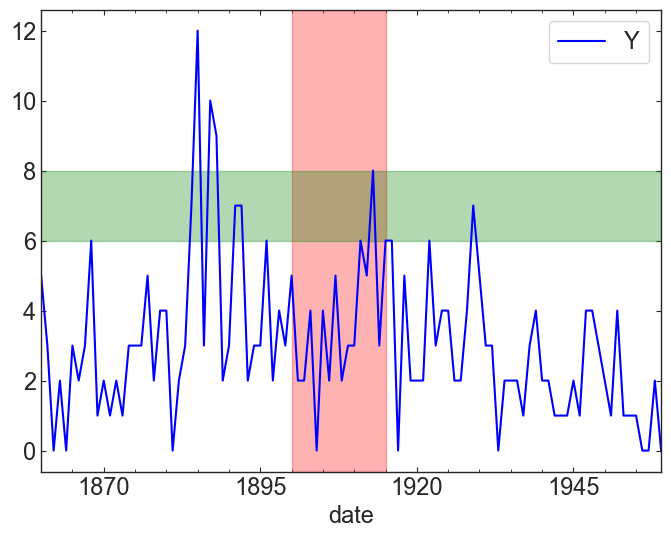

In [9]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue')

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3);

# Summary Statistics and Diagnostics

In [10]:
co2_levels.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [11]:
# Print out the number of missing values
co2_levels.isnull().sum()

co2    59
dtype: int64

In [12]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
co2_levels.isnull().sum()

co2    0
dtype: int64

## Rolling average

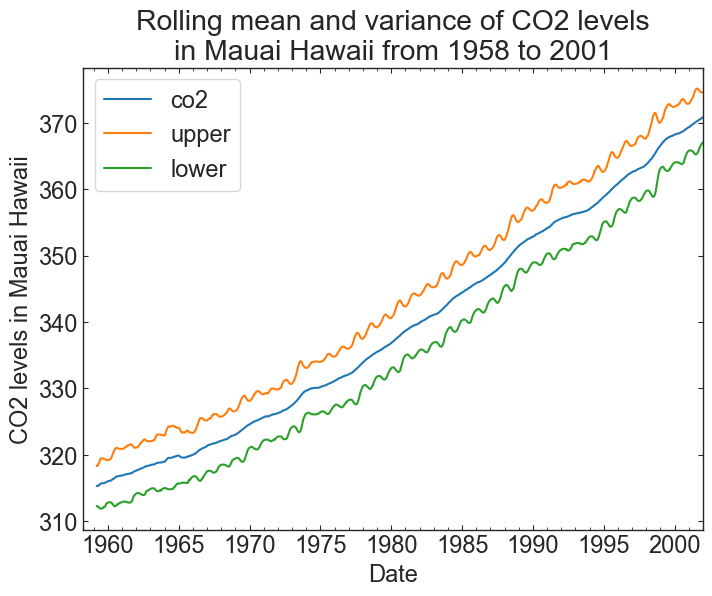

In [13]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax = ma.plot()

# Specify labels, legend, and show the plot
ax.set_xlabel('Date')
ax.set_ylabel('CO2 levels in Mauai Hawaii')
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001');

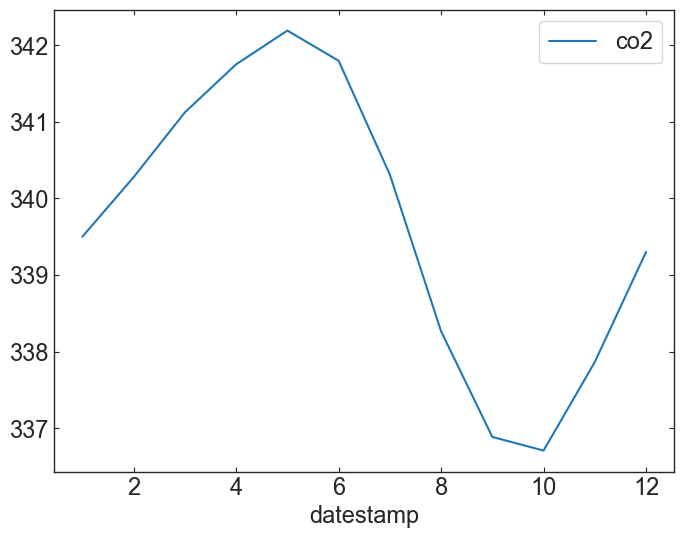

In [14]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot();

In [15]:
# Print out summary statistics of the co2_levels DataFrame
co2_levels.describe()

,co2
count,2284.000000
mean,339.657750
std,17.100899
min,313.000000
25%,323.975000
50%,337.700000
75%,354.500000
max,373.900000


In [16]:
# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

313.0
373.9


## Boxplot & Histplot

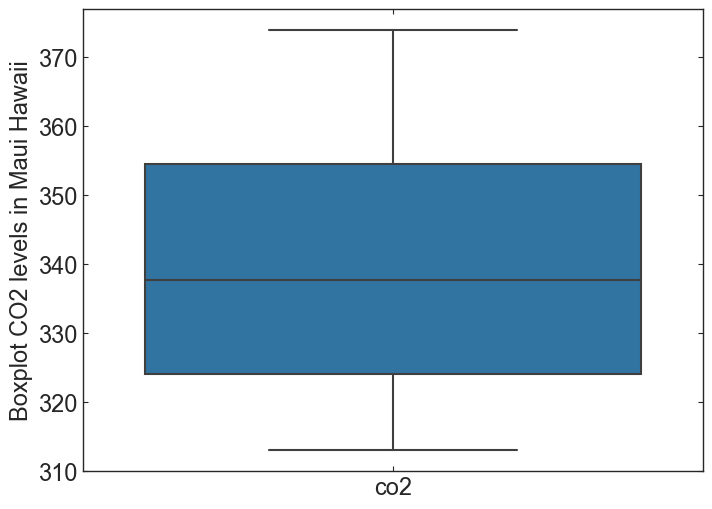

In [17]:
ax = sns.boxplot(data=co2_levels)

# Set the labels and display the plot
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii');

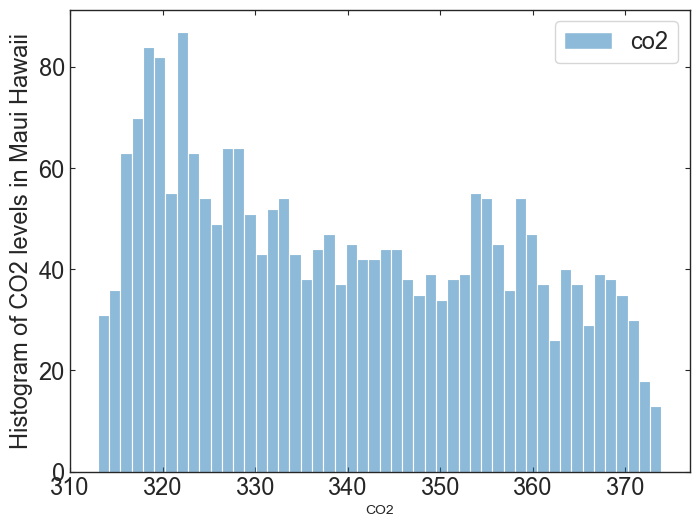

In [18]:
# Generate a histogram
ax = sns.histplot(data=co2_levels, bins=50)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii');

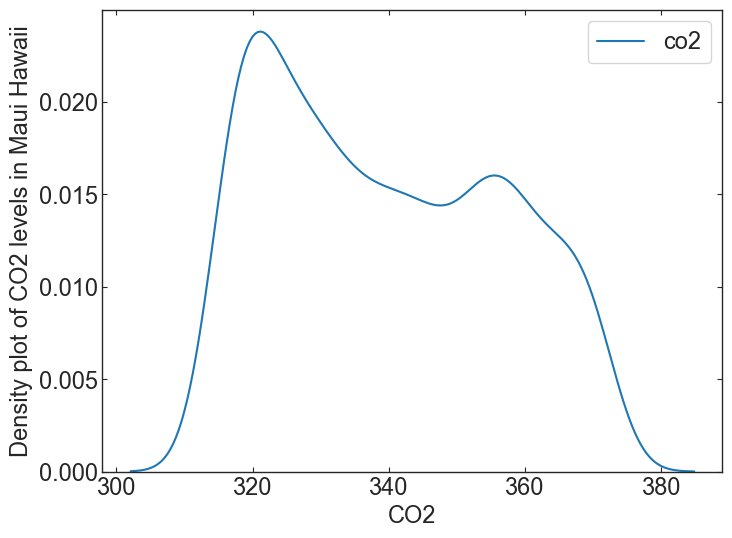

In [19]:
# Display density plot of CO2 levels values
ax = sns.kdeplot(data=co2_levels)

# Annotate x-axis labels
ax.set_xlabel('CO2')

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii');

# Seasonality, Trend and Noise

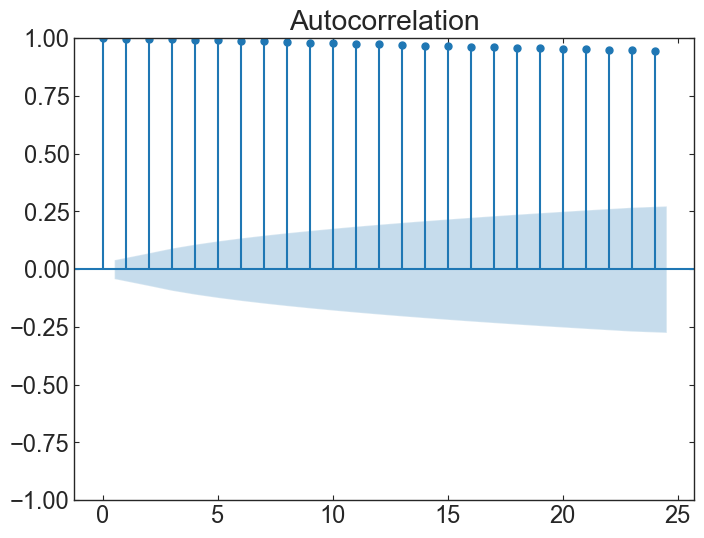

In [20]:
# Display the autocorrelation plot of your time series
fig = plot_acf(co2_levels['co2'], lags=24);

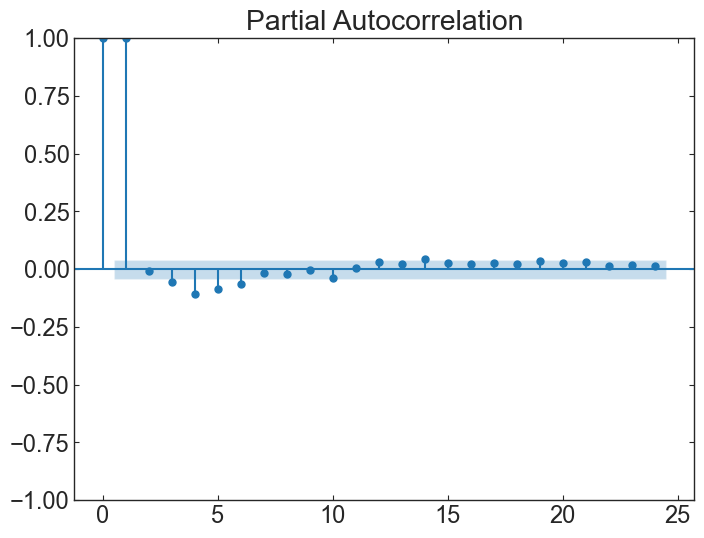

In [21]:
# Display the partial autocorrelation plot of your time series
fig = plot_pacf(co2_levels['co2'], lags=24);

In [22]:
# Perform time series decompositon
decomposition = seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


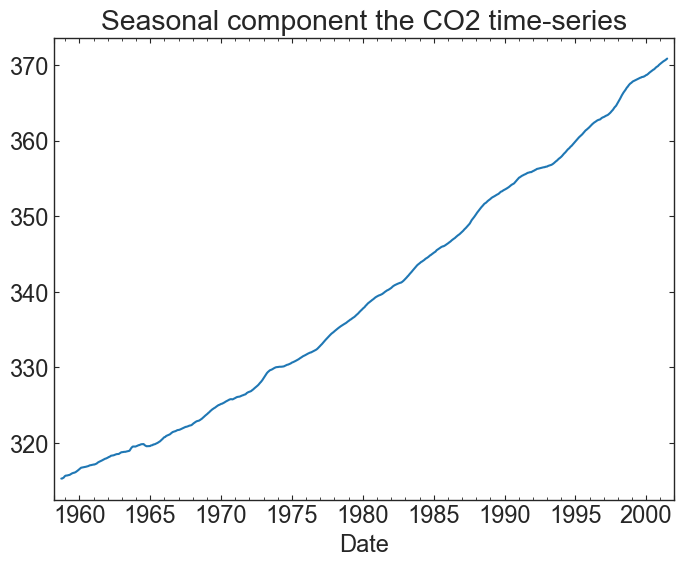

In [23]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot()

# Specify axis labels
ax.set_xlabel('Date')
ax.set_title('Seasonal component the CO2 time-series');

In [24]:
airline.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### airline passenger analysis

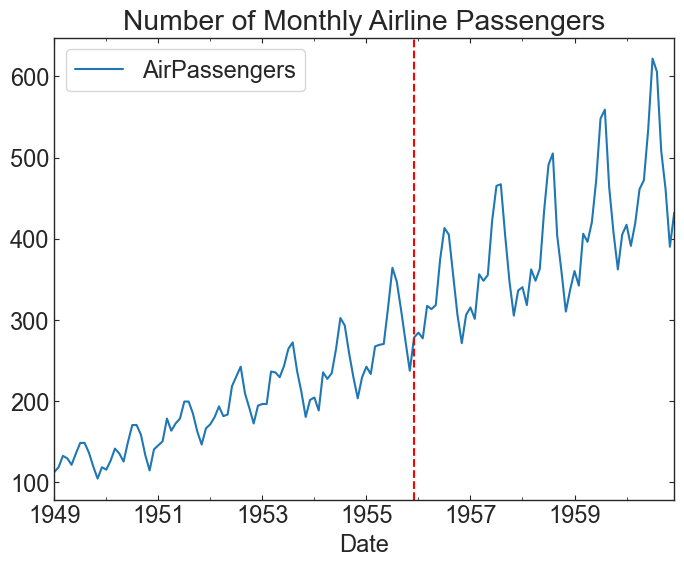

In [25]:
# Plot the time series in your DataFrame
ax = airline.plot()

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date')
ax.set_title('Number of Monthly Airline Passengers');

In [26]:
airline.isnull().sum()

AirPassengers    0
dtype: int64

In [27]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
AirPassengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


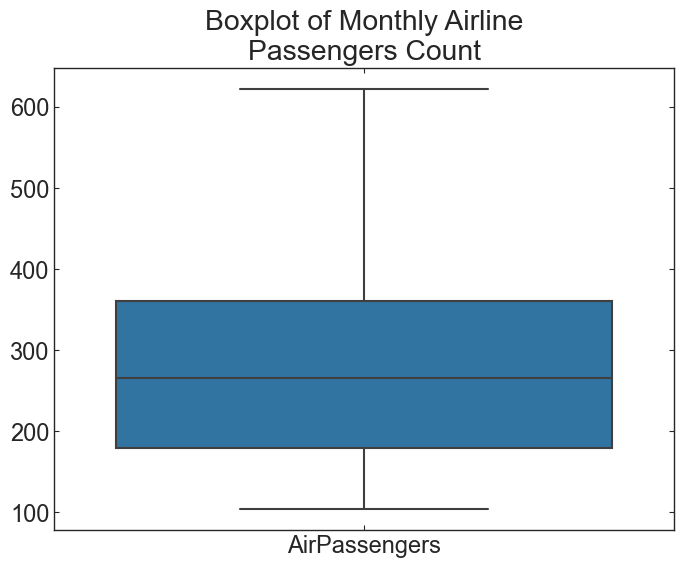

In [28]:
ax = sns.boxplot(data=airline)

ax.set_title('Boxplot of Monthly Airline\nPassengers Count');

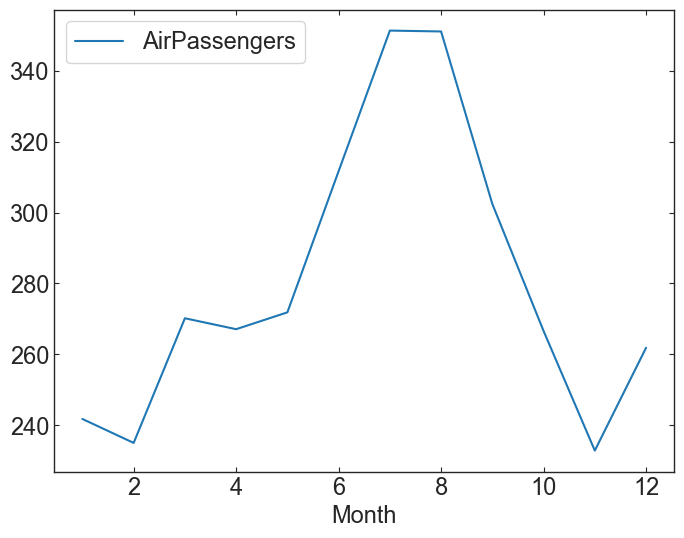

In [29]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot();

In [30]:
# Perform time series decompositon
decomposition = seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

airline_decomposed = pd.concat([trend, seasonal], axis=1)

In [31]:
airline_decomposed.head()

,trend,seasonal
Month,,
1949-01-01,NaN,-24.748737
1949-02-01,NaN,-36.188131
1949-03-01,NaN,-2.241162
1949-04-01,NaN,-8.036616
1949-05-01,NaN,-4.506313


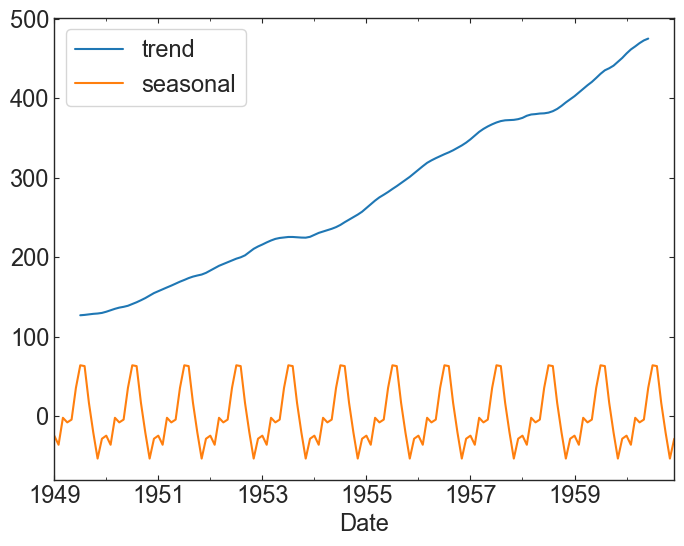

In [32]:
# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot()

# Specify axis labels
ax.set_xlabel('Date');

# Work w/ Multiple Time seires

In [33]:
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [34]:
meat.describe().T

,count,mean,std,min,25%,50%,75%,max
beef,827.0,1683.463362,501.698480,366.0,1231.50,1853.0,2070.00,2512.0
veal,827.0,54.198549,39.062804,8.8,24.00,40.0,79.00,215.0
pork,827.0,1211.683797,371.311802,124.0,934.50,1156.0,1466.00,2210.4
lamb_and_mutton,827.0,38.360701,19.624340,10.9,23.00,31.0,55.00,109.0
broilers,635.0,1516.582520,963.012101,250.9,636.35,1211.3,2426.65,3383.8
other_chicken,143.0,43.033566,3.867141,32.3,40.20,43.4,45.65,51.1
turkey,635.0,292.814646,162.482638,12.4,154.15,278.3,449.15,585.1


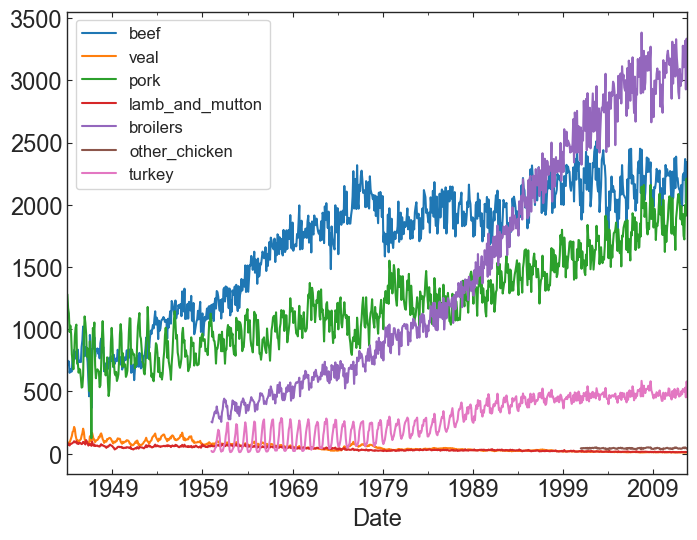

In [35]:
# Plot time series dataset
ax = meat.plot()

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=12);

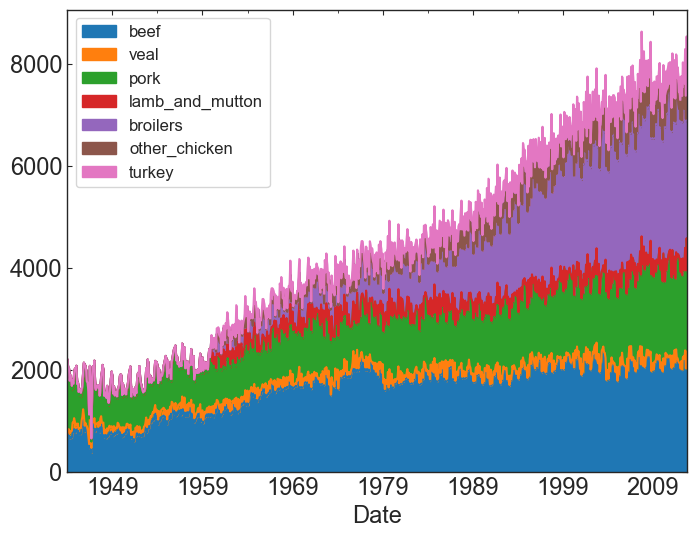

In [36]:
# Plot an area chart
ax = meat.plot.area()

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=12);

## Add summary Statistics to the time series plot

In [37]:
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [38]:
meat_mean = meat.mean().to_frame().T

meat_mean.rename(index={0:'mean'}, inplace=True)

meat_mean

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
mean,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


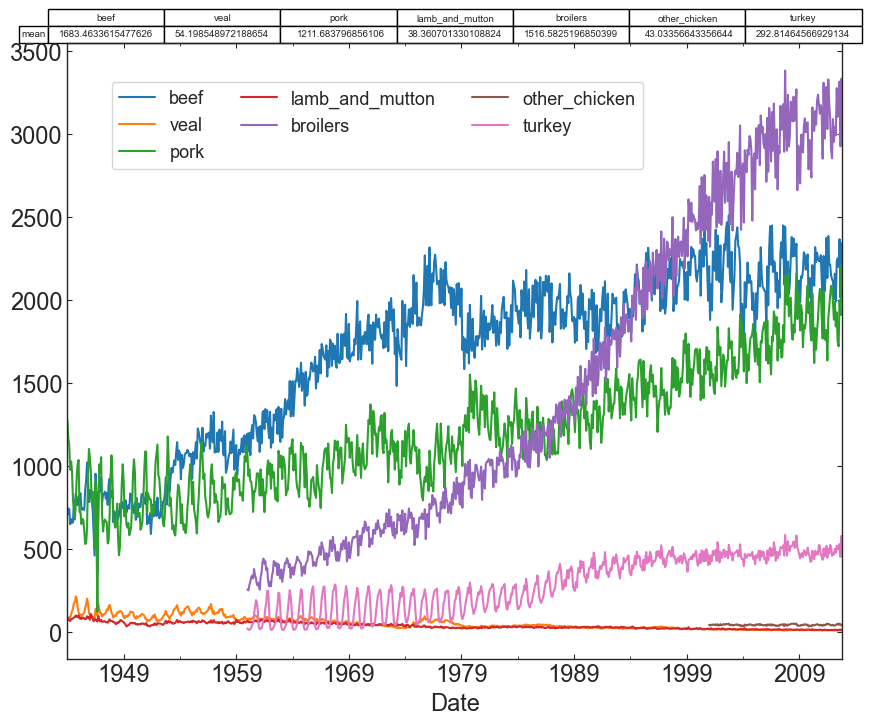

In [39]:
# Plot the meat data
ax = meat.plot(figsize=(10,8))

# Add x-axis labels
ax.set_xlabel('Date')

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 0.95), ncol=3, fontsize=13);

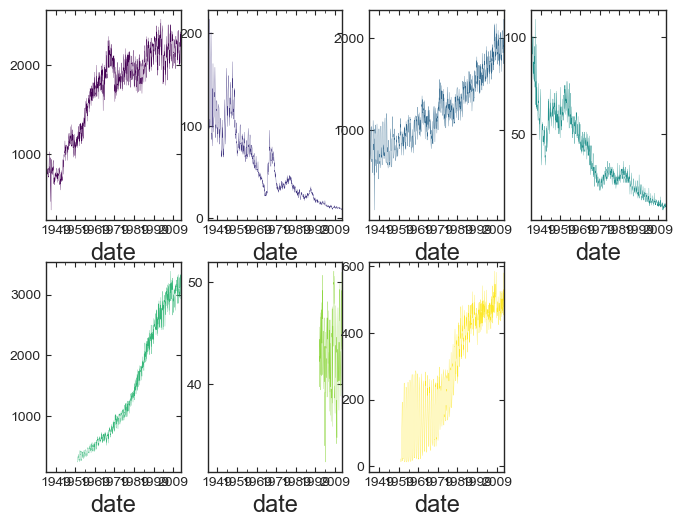

In [40]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, layout=(2,4), sharex=False, sharey=False, \
          colormap='viridis', fontsize=10, legend=False, linewidth=0.2);

## Correlation between time series

In [41]:
# Compute the correlation between the beef and pork columns using the spearman method
meat[['beef', 'pork']].corr(method='spearman')

,beef,pork
beef,1.000000,0.827587
pork,0.827587,1.000000


In [42]:
print(meat[['beef', 'pork']].corr(method='spearman').loc['beef','pork'])

0.8275872847134006


In [43]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
meat[['pork', 'veal', 'turkey']].corr(method='pearson')

,pork,veal,turkey
pork,1.000000,-0.808834,0.835215
veal,-0.808834,1.000000,-0.768366
turkey,0.835215,-0.768366,1.000000


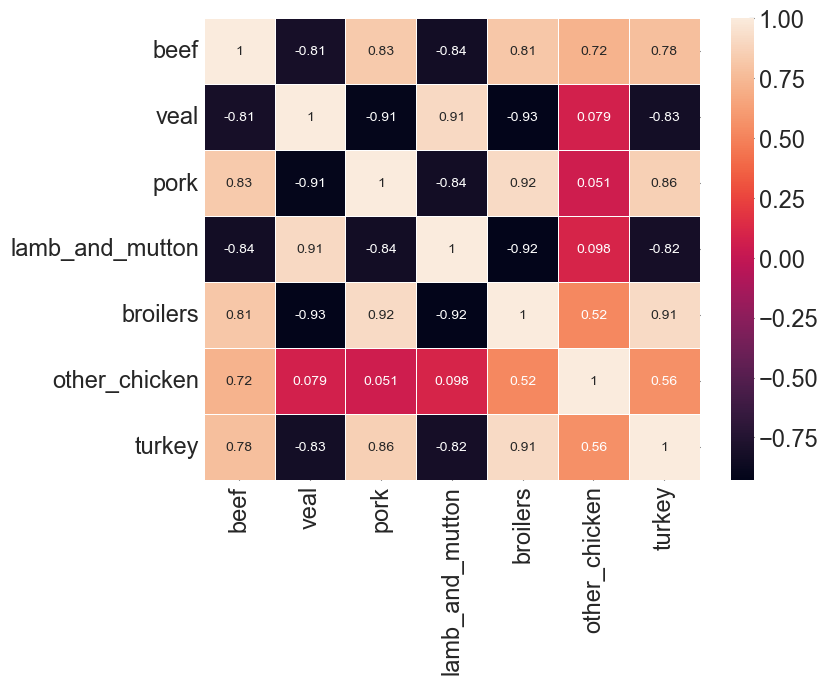

In [44]:
# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
ax = sns.heatmap(corr_meat, annot=True, linewidths=0.4, annot_kws={"size": 10});

### Clustermap

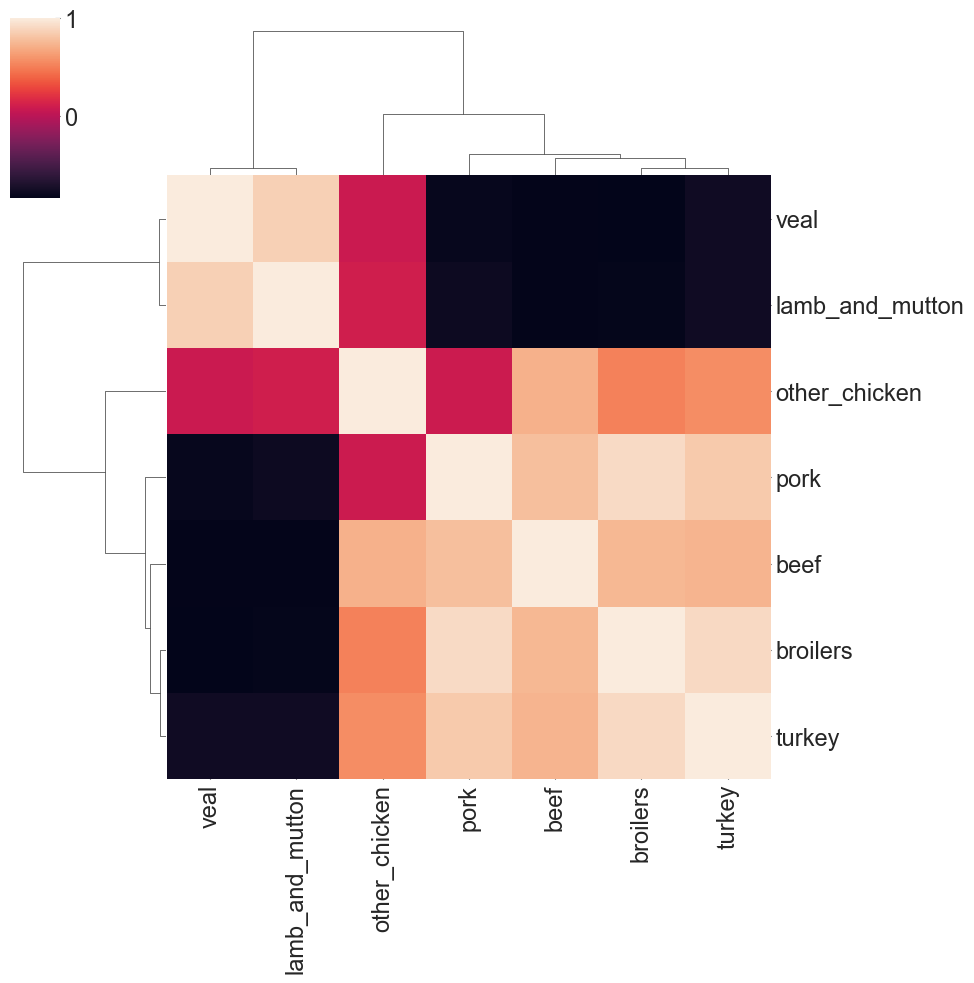

In [45]:
# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat, row_cluster=True, col_cluster=True, figsize=(10, 10));

# Case Study: Unemployment Rate

In [46]:
jobs.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [47]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2000-01-01 to 2010-02-01
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Agriculture                     122 non-null    float64
 1   Business services               122 non-null    float64
 2   Construction                    122 non-null    float64
 3   Durable goods manufacturing     122 non-null    float64
 4   Education and Health            122 non-null    float64
 5   Finance                         122 non-null    float64
 6   Government                      122 non-null    float64
 7   Information                     122 non-null    float64
 8   Leisure and hospitality         122 non-null    float64
 9   Manufacturing                   122 non-null    float64
 10  Mining and Extraction           122 non-null    float64
 11  Nondurable goods manufacturing  122 non-null    float64
 12  Other            

In [48]:
jobs.isnull().sum()

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

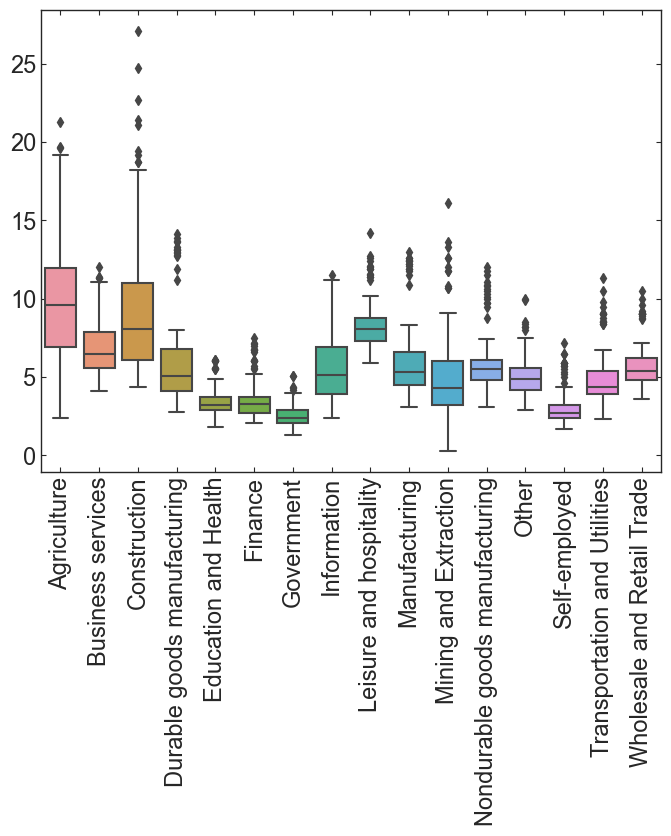

In [49]:
ax = sns.boxplot(data=jobs)

ax.tick_params(axis='x', rotation=90);

In [50]:
jobs.describe().T

,count,mean,std,min,25%,50%,75%,max
Agriculture,122.0,9.840984,3.962067,2.4,6.900,9.60,11.950,21.3
Business services,122.0,6.919672,1.862534,4.1,5.600,6.45,7.875,12.0
Construction,122.0,9.426230,4.587619,4.4,6.100,8.10,10.975,27.1
Durable goods manufacturing,122.0,6.025410,2.854475,2.8,4.125,5.10,6.775,14.1
Education and Health,122.0,3.420492,0.877538,1.8,2.900,3.20,3.700,6.1
Finance,122.0,3.540164,1.235405,2.1,2.700,3.30,3.700,7.5
Government,122.0,2.581148,0.686750,1.3,2.100,2.40,2.875,5.1
Information,122.0,5.486885,2.016582,2.4,3.900,5.15,6.900,11.5
Leisure and hospitality,122.0,8.315574,1.605570,5.9,7.300,8.05,8.800,14.2
Manufacturing,122.0,5.982787,2.484221,3.1,4.500,5.30,6.600,13.0


In [51]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
jobs_subset.head()

,Finance,Information,Manufacturing,Construction
datestamp,,,,
2000-01-01,2.7,3.4,3.6,9.7
2000-02-01,2.8,2.9,3.4,10.6
2000-03-01,2.6,3.6,3.6,8.7
2000-04-01,2.3,2.4,3.7,5.8
2000-05-01,2.2,3.5,3.4,5.0


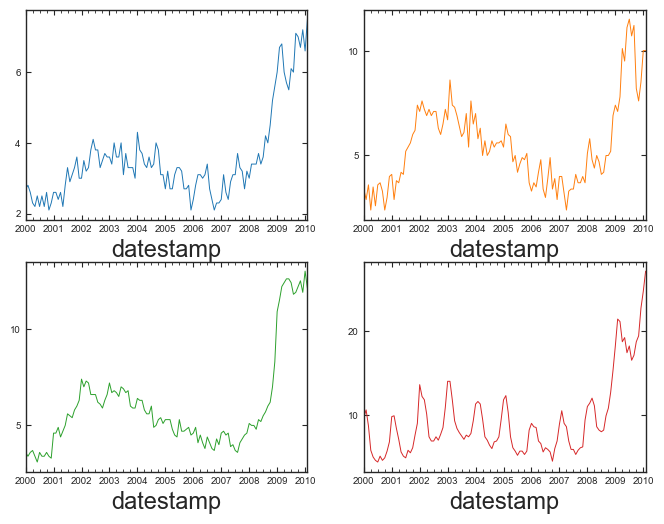

In [52]:
# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True, layout=(2,2), sharex=False, sharey=False, \
                      linewidth=0.7, fontsize=7, legend=False);

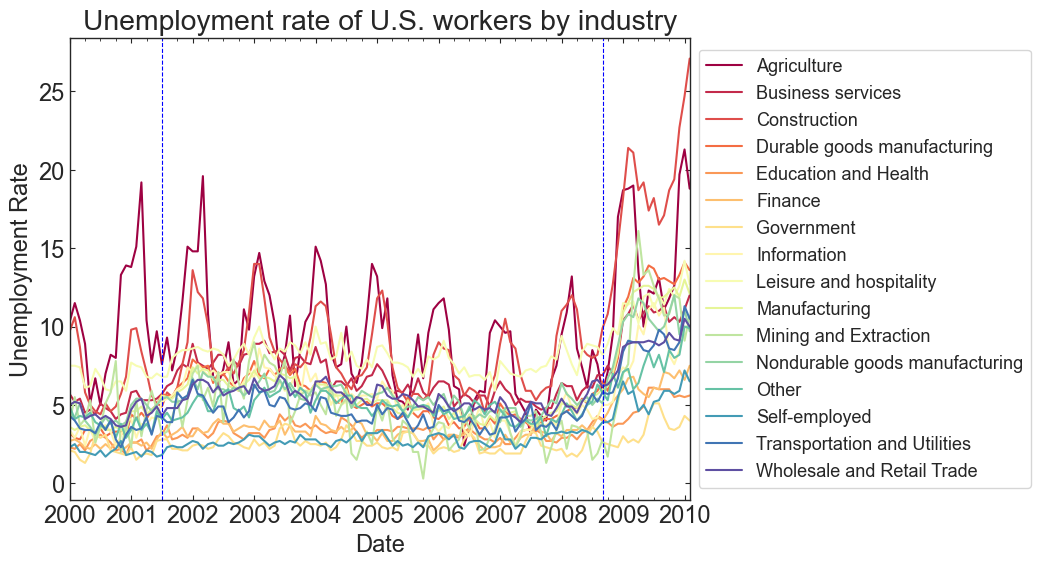

In [53]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral')

# Set labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment rate of U.S. workers by industry')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=13)

# Annotate your plots with vertical lines
ax.axvline(x='2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline(x='2008-09-01', color='blue', linestyle='--', linewidth=0.8);

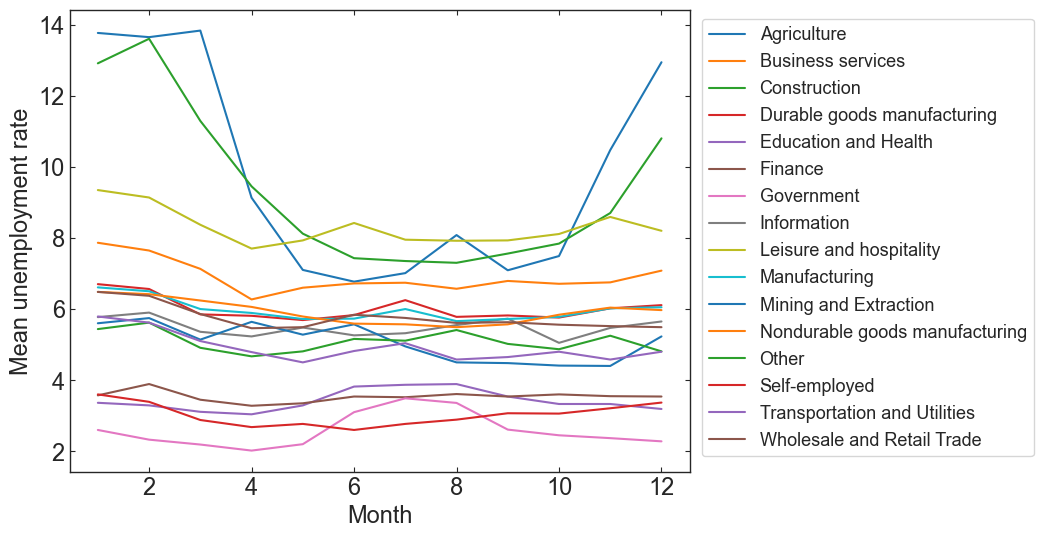

In [54]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot()

# Set axis labels and legend
ax.set_xlabel('Month')
ax.set_ylabel('Mean unemployment rate')
ax.legend(loc='upper right',bbox_to_anchor=(1.57, 1.), fontsize=13)

In [55]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

In [56]:
jobs_seasonal = {}

# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

In [57]:
seasonality_df.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
2000-01-01,3.748816,0.981096,3.184209,0.567948,-0.060934,-0.024861,-0.040779,0.195768,0.905135,0.527751,0.626319,0.460610,0.094796,0.470752,0.652473,0.630714
2000-02-01,3.687704,0.614429,3.545320,0.396651,-0.178063,0.218657,-0.349113,0.337897,0.768098,0.437010,0.375856,0.505517,0.378129,0.239734,0.511269,0.487195
2000-03-01,4.546038,0.443596,2.579117,0.304522,-0.185934,0.113102,-0.279205,0.046694,0.270413,0.403214,0.399931,0.518017,0.008684,0.038345,0.478399,0.288121
2000-04-01,-0.540536,-0.471682,0.735135,0.103133,-0.253063,-0.085509,-0.462539,-0.027843,-0.382365,0.190714,0.874468,0.379591,-0.287149,-0.219062,0.092751,-0.095212
2000-05-01,-2.388221,-0.184645,-0.781069,-0.118164,-0.075285,-0.038287,-0.343094,0.079564,-0.190235,-0.046786,0.280949,0.053665,-0.210297,-0.138970,-0.285027,-0.137342


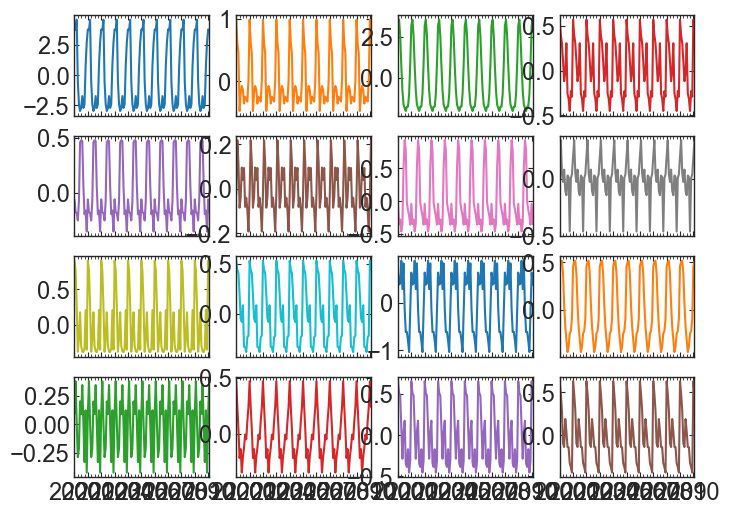

In [58]:
# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True, layout=(4,4), sharey=False, legend=False);

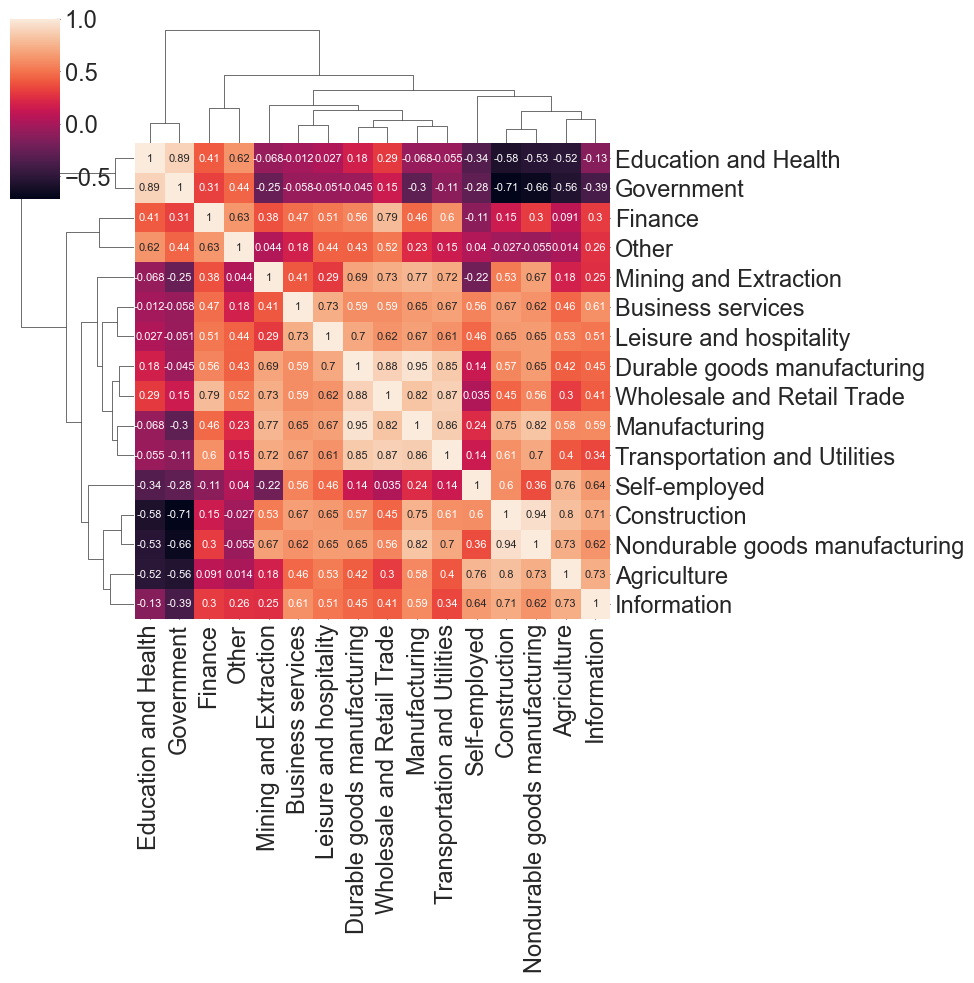

In [59]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 8});